In [109]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

# Wczytanie zbiorów danych i wyświetlenie przykładowych rekordów

In [36]:
train = pd.read_csv('http://home.agh.edu.pl/~czech/datasets/ed-titanic-training.csv', index_col=0)
test = pd.read_csv('http://home.agh.edu.pl/~czech/datasets/ed-titanic-test.csv', index_col=0)
train.head(3)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,0,2,0,3,1,1,2,0,3
2,1,3,0,1,0,1,0,0,1,1,4


# Korelacje Pearsona

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

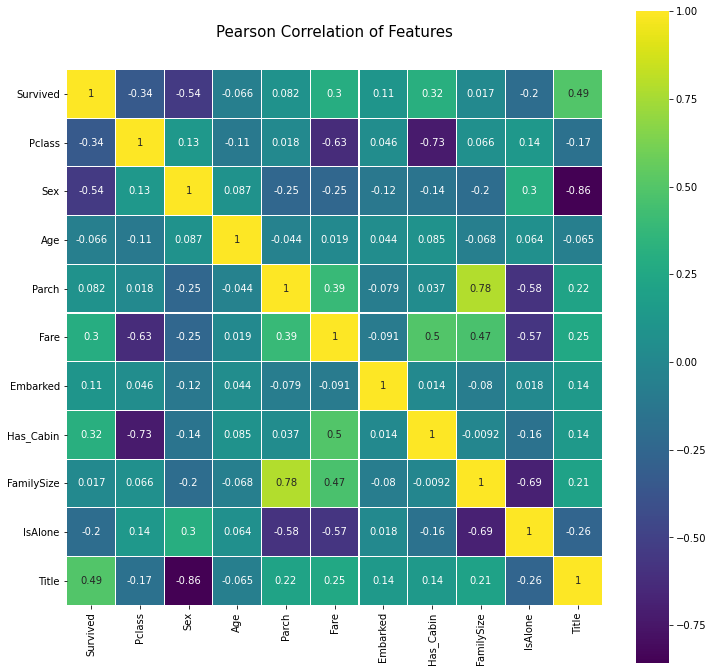

In [37]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,
square=True, cmap=colormap, linecolor='white', annot=True)

Z etykietą przeżycia najbardziej skorelowane są tytuł i płeć.
Między sobą najbardziej skorelowane są płeć i tytuł. Również wysoki współczynnik korelacji wykazują pary: Has_Cabin, Pclass oraz FamilySize, IsAlone.

# Współczynniki przeżywalności dla tytułów

In [38]:
train.groupby('Title').mean()['Survived']

Title
1    0.156673
2    0.575000
3    0.793651
4    0.702703
5    0.347826
Name: Survived, dtype: float64

Najwyższy współczynnik przeżywalności ma klasa 3, co sugeruje, że mogą nią być oznaczeni arystokracji, bądź kobiety lub dzieci.

# Wyznaczenie najlepszej głębokości drzewa decyzyjnego

In [106]:
x_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]

criterion = None
depth = 0
best_cvs = 0

for max_depth in range(1, 20):
    for crit in ['gini', 'entropy']:
        dtc = DecisionTreeClassifier(max_depth=max_depth, criterion=crit)
        cvs = cross_val_score(dtc, x_train, y_train, cv=10).mean()
        print(max_depth, cvs, crit)
        if cvs > best_cvs:
            best_cvs = cvs
            depth = max_depth
            criterion = crit
    print('\n')

1 0.7822846441947565 gini
1 0.7822846441947565 entropy


2 0.7912983770287141 gini
2 0.7890511860174781 entropy


3 0.8305243445692885 gini
3 0.8316479400749064 entropy


4 0.8125468164794007 gini
4 0.8215355805243446 entropy


5 0.8103245942571785 gini
5 0.8260424469413234 entropy


6 0.8070287141073658 gini
6 0.818227215980025 entropy


7 0.8182272159800249 gini
7 0.8103495630461923 entropy


8 0.8148938826466916 gini
8 0.812621722846442 entropy


9 0.8260923845193509 gini
9 0.8226966292134831 entropy


10 0.8238826466916354 gini
10 0.8092634207240949 entropy


11 0.8182646691635455 gini
11 0.8126342072409487 entropy


12 0.8092883895131087 gini
12 0.8036579275905119 entropy


13 0.8194007490636703 gini
13 0.8059051186017478 entropy


14 0.8160174781523095 gini
14 0.8047815230961299 entropy


15 0.8160299625468165 gini
15 0.8103870162297129 entropy


16 0.8115355805243446 gini
16 0.8070287141073658 entropy


17 0.8171410736579275 gini
17 0.8047940074906366 entropy


18 0.811535580524

In [107]:
print('Najlepsze parametry:')
print('Max depth: ', depth)
print('Criterion: ', criterion)

Najlepsze parametry:
Max depth:  3
Criterion:  entropy


# Budowa drzewa decyzyjnego w oparciu o najlepsze parametry wyznaczone powyżej

In [70]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth = depth, criterion=criteration)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Predykcja możliwości przeżycia pasażerów i zapis wyników do pliku

In [117]:
predication = decision_tree.predict(test)
print(predication)

np.savetxt('predication.txt', predication)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 0 0 0 1]


# Wizualizacja drzewa decyzyjnego

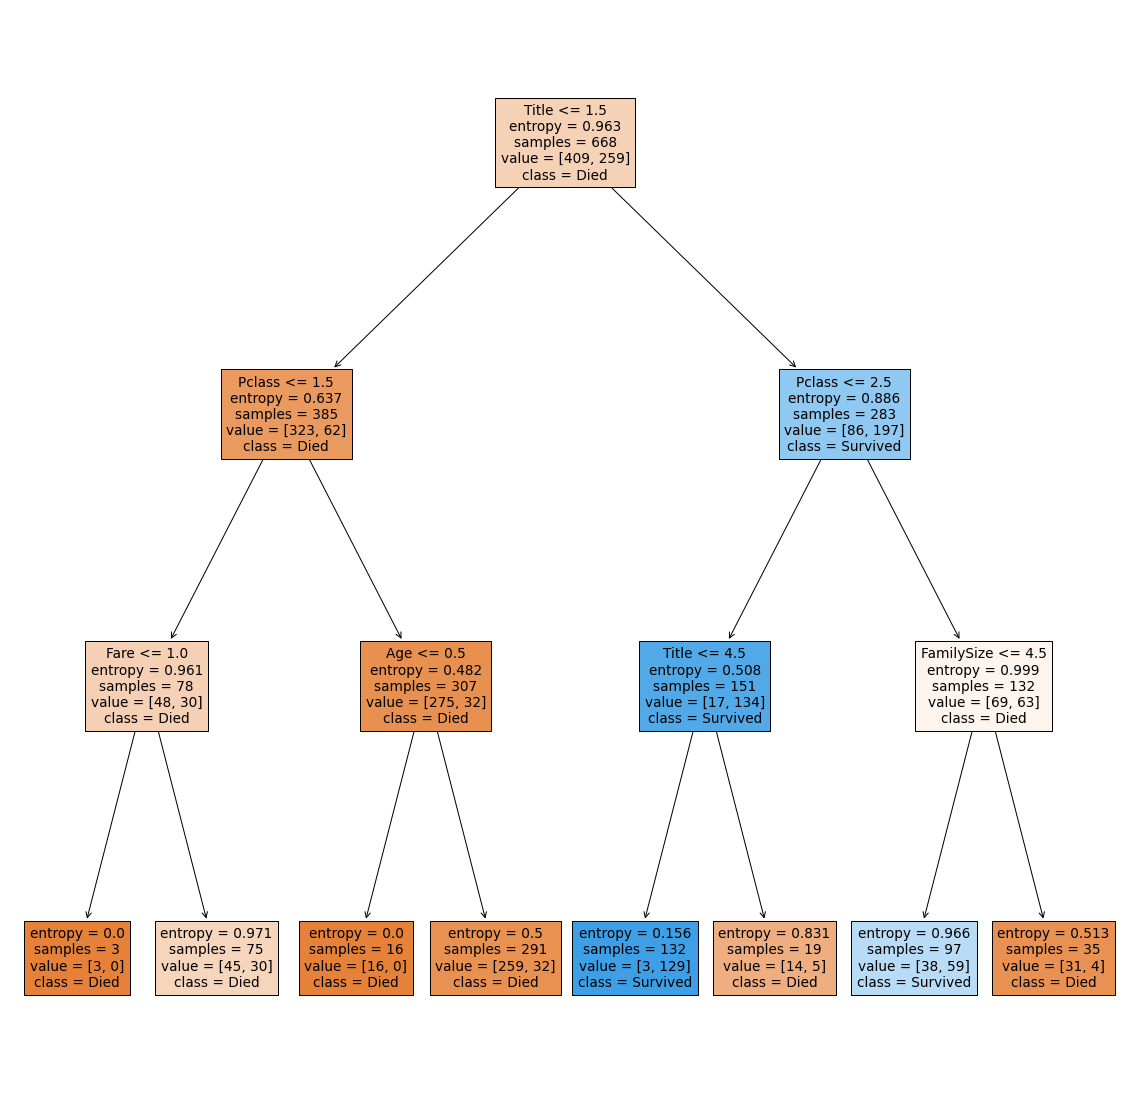

In [118]:
plt.figure(figsize=(20, 20))
tree.plot_tree(decision_tree, feature_names=test.columns, class_names=['Died', 'Survived'], filled=True)
plt.show()

# Sprawdzenie wpływu parametrów na dokładność klasyfikacji

In [114]:
criterion = None
depth = 0
best_cvs = 0
msl = 0

for max_depth in range(1, 20):
    for crit in ['gini', 'entropy']:
        for samples in [1, 3, 5, 7, 9]:
            dtc = DecisionTreeClassifier(max_depth=max_depth, criterion=crit, min_samples_leaf=samples)
            dtc.fit(x_train, y_train)
            predicted = dtc.predict(x_train)
            accuracy = accuracy_score(y_train, predicted)
            print('Max depth:', max_depth, '   Accuracy:', accuracy, '   Criterion:', crit, '   Min samples leaf:', samples)
        print('\n')

Max depth: 1    Accuracy: 0.7822671156004489    Criterion: gini    Min samples leaf: 1
Max depth: 1    Accuracy: 0.7822671156004489    Criterion: gini    Min samples leaf: 3
Max depth: 1    Accuracy: 0.7822671156004489    Criterion: gini    Min samples leaf: 5
Max depth: 1    Accuracy: 0.7822671156004489    Criterion: gini    Min samples leaf: 7
Max depth: 1    Accuracy: 0.7822671156004489    Criterion: gini    Min samples leaf: 9


Max depth: 1    Accuracy: 0.7822671156004489    Criterion: entropy    Min samples leaf: 1
Max depth: 1    Accuracy: 0.7822671156004489    Criterion: entropy    Min samples leaf: 3
Max depth: 1    Accuracy: 0.7822671156004489    Criterion: entropy    Min samples leaf: 5
Max depth: 1    Accuracy: 0.7822671156004489    Criterion: entropy    Min samples leaf: 7
Max depth: 1    Accuracy: 0.7822671156004489    Criterion: entropy    Min samples leaf: 9


Max depth: 2    Accuracy: 0.8170594837261503    Criterion: gini    Min samples leaf: 1
Max depth: 2    Accuracy

Możemy zauważyć, że maksymalna głębkość drzewa przyczynia się do polepszenia dokładności. Wpływ najmniejszej liczby rekordów w liściu przy niskich maksymalnych głębokościach jest niewidoczny, ma on znaczenie dopiero przy wyższych wartościach max_depth i powoduje on niewielnie obniżenie dokładności. Wpływ kryteriów podziału: dla wyższych wartości min_samples_leaf lepsze rezultaty daje entropy.

# Podział zbioru treningowego

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.25)

# Wyznaczenie i wizualizacja macierzy rozbieżności

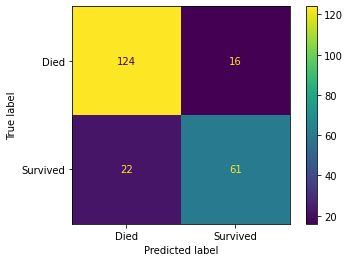

In [93]:
from sklearn.metrics import plot_confusion_matrix

decision_tree.fit(X_train, Y_train)

plot_confusion_matrix(decision_tree, X_test, Y_test, display_labels=['Died', 'Survived'])
plt.show() 

# Miary jakości klasyfikatora

Accuracy

In [96]:
accuracy_score(Y_test, decision_tree.predict(X_test))

0.8295964125560538

f1-score

In [97]:
f1_score(Y_test, decision_tree.predict(X_test))

0.7625

Average precision-recall

In [98]:
average_precision_score(Y_test, decision_tree.predict(X_test))

0.6808797124319302